In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Load the data

In [54]:
from sklearn.datasets import load_digits

digits = load_digits()
df_digits = pd.DataFrame(digits.data, columns=digits.feature_names)
df_digits['target'] = digits.target

In [55]:
df_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## Standardization

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [57]:
X_scaled = scaler.fit_transform(df_digits.drop('target', axis=1))

## Feature Selection

In [58]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

In [59]:
pca_results = pca.fit_transform(X_scaled)

## KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=7)
y = df_digits['target']
X_train, X_test, y_train, y_test = train_test_split(pca_results, y, test_size=0.2, random_state=42)

In [61]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1437, 360, 1437, 360)

In [62]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [63]:
knn.score(X_test, y_test)

0.9722222222222222

In [64]:
prediction = knn.predict(pca_results)

In [65]:
df_digits['prediction'] = prediction

In [66]:
df_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,prediction
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,4


## Confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, prediction)

In [68]:
cm

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 176,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   1, 180,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0, 177,   0,   0,   3,   0,   1],
       [  0,   0,   0,   0,   0, 177,   1,   0,   0,   4],
       [  0,   0,   0,   0,   0,   0, 181,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0, 177,   0,   1],
       [  0,   5,   1,   1,   0,   0,   0,   0, 166,   1],
       [  0,   0,   0,   3,   1,   2,   1,   1,   2, 170]], dtype=int64)

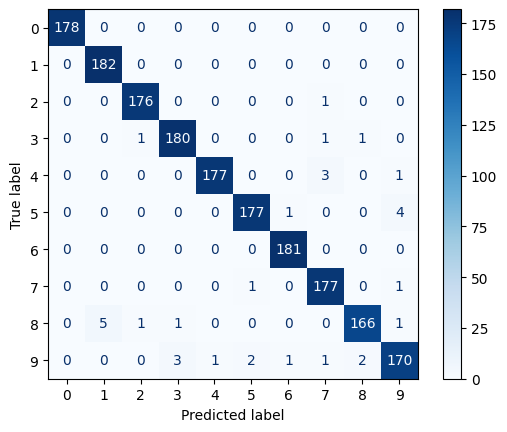

In [69]:
cm_disp = ConfusionMatrixDisplay(cm, display_labels=digits.target_names)
cm_disp.plot(cmap=plt.cm.Blues)
plt.show()